<a href="https://colab.research.google.com/github/raylikeschicken/TUGAS-BESAR-AKA/blob/main/tubesAKA(revisi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving filmAKA.xlsx to filmAKA (5).xlsx
Pilih genre (Action, Comedy, Horror, Drama, Thriller): DRama
Sort secara ascending atau descending (asc/desc)? asc
+------------------------------------------+-------+--------------+----------------------+---------------------+
|                   Film                   | Genre |  Box Office  | Bubble Sort Time (s) | Merge Sort Time (s) |
+------------------------------------------+-------+--------------+----------------------+---------------------+
|                 Titanic                  | Drama | $223,048,786 |       0.000200       |       0.000144      |
|              Full River Red              | Drama | $634,631,282 |       0.000200       |       0.000144      |
|               Forrest Gump               | Drama | $679,835,137 |       0.000200       |       0.000144      |
| The Twilight Saga: Breaking Dawn, Part 1 | Drama | $683,212,735 |       0.000200       |       0.000144      |
|       The Twilight Saga: New Moon        | Drama | $

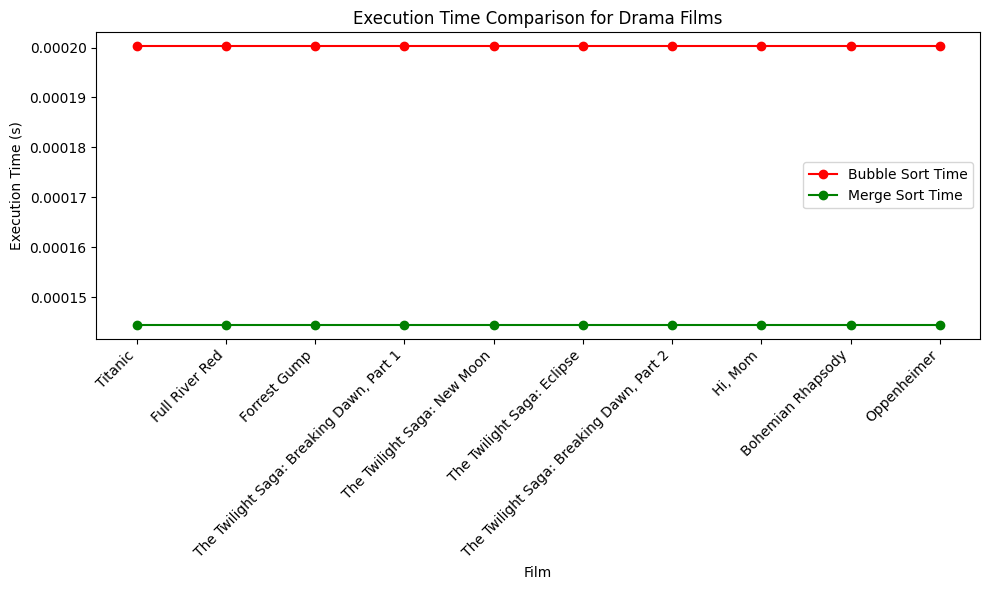

In [38]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from google.colab import files
import pandas as pd

Upload = files.upload()
df = pd.read_excel("filmAKA.xlsx", engine="openpyxl")

df.rename(columns=lambda x: x.strip(), inplace=True)

df['Genre'] = df['Genre'].str.strip()



films = {
    "Action": [],
    "Comedy": [],
    "Horror": [],
    "Drama": [],
    "Thriller": []
}

# Populate the films dictionary
for _, row in df.iterrows():
    films[row['Genre']].append((row['Film'], row['Box Office']))

# Bubble Sort (iteratif) with ascending/descending logic
def bubble_sort(film_list, ascending):
    n = len(film_list)
    for i in range(n):
        for j in range(0, n-i-1):
            if (ascending and film_list[j][1] > film_list[j+1][1]) or (not ascending and film_list[j][1] < film_list[j+1][1]):
                film_list[j], film_list[j+1] = film_list[j+1], film_list[j]
    return film_list

# Merge Sort (rekursif) with ascending/descending logic
def merge_sort(film_list, ascending):
    if len(film_list) > 1:
        mid = len(film_list) // 2
        left = merge_sort(film_list[:mid], ascending)
        right = merge_sort(film_list[mid:], ascending)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if (ascending and left[i][1] < right[j][1]) or (not ascending and left[i][1] > right[j][1]):
                film_list[k] = left[i]
                i += 1
            else:
                film_list[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            film_list[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            film_list[k] = right[j]
            j += 1
            k += 1
    return film_list

# Tabel untuk menyimpan data waktu eksekusi
film_table = PrettyTable()
film_table.field_names = ["Film", "Genre", "Box Office", "Bubble Sort Time (s)", "Merge Sort Time (s)"]

# Program utama
genre = input("Pilih genre (Action, Comedy, Horror, Drama, Thriller): ").capitalize()

# Pilihan sorting
order = input("Sort secara ascending atau descending (asc/desc)? ").lower()
ascending = True if order == 'asc' else False

# Sorting film berdasarkan genre yang dipilih
films_to_sort = films[genre]

# Ukur waktu bubble sort
start_time = time.time()
sorted_bubble = bubble_sort(films_to_sort.copy(), ascending)  # Pass ascending here
bubble_sort_time = time.time() - start_time

# Ukur waktu merge sort
start_time = time.time()
sorted_merge = merge_sort(films_to_sort.copy(), ascending)  # Pass ascending here
merge_sort_time = time.time() - start_time

# Menambahkan data ke dalam tabel
for film, revenue in sorted_bubble:  # Use sorted_bubble instead of films_to_sort
    film_table.add_row([film, genre, f"${revenue:,}", f"{bubble_sort_time:.6f}", f"{merge_sort_time:.6f}"])

print(film_table)

# Diagram garis untuk waktu eksekusi
plt.figure(figsize=(10, 6))
plt.plot([film[0] for film in sorted_bubble], [bubble_sort_time] * len(sorted_bubble), label="Bubble Sort Time", marker='o', color='red')
plt.plot([film[0] for film in sorted_bubble], [merge_sort_time] * len(sorted_bubble), label="Merge Sort Time", marker='o', color='green')
plt.title(f"Execution Time Comparison for {genre} Films")
plt.xlabel("Film")
plt.ylabel("Execution Time (s)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
